In [8]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = [u'simHei']
plt.rcParams['axes.unicode_minus'] = False

# 加载数据
data = pd.read_csv('./dataset/electricity/electricity.csv')

# 将日期转换为日期格式
data['date'] = pd.to_datetime(data['date'])
# 提取年、月、日和小时信息，并添加为新的列
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour

# 将新添加的列移到数据框的前面
cols = ['year', 'month', 'hour', 'day'] + list(data.columns[:-4])
data = data[cols]
data=data.drop(columns=['date'])
# 提取特征和目标值
features = data.iloc[:, 3:].values  # 假设前四列是日期时间
target = data.iloc[:, 3:].values
# 标准化特征
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [41]:
def compute_fft_features(data):
    num_samples, num_features = data.shape

    magnitude_features = np.zeros((num_samples, num_features))
    phase_features = np.zeros((num_samples, num_features))


    for i in range(num_features):
        fft_result = np.fft.fft(data[:, i])
        magnitude_features[:, i] = np.abs(fft_result)
        phase_features[:, i] = np.angle(fft_result)

    # 这里只取前一半的频域特征
    num_freq_bins = magnitude_features.shape[1] // 2
    magnitude_features = magnitude_features[:, :num_freq_bins]
    phase_features = phase_features[:, :num_freq_bins]

    return np.concatenate([magnitude_features, phase_features], axis=1)


freq_domain_features = compute_fft_features(features_scaled)
tensor = torch.from_numpy(freq_domain_features)
print(tensor.shape)
linear=nn.Linear(322, 321)
tensor = tensor.to(linear.weight.dtype)
print(tensor.dtype)  # 打印输入张量的数据类型
x=linear(tensor)
x=x.permute(1,0)
print(x.shape)


torch.Size([26304, 322])
torch.float32
torch.Size([321, 26304])


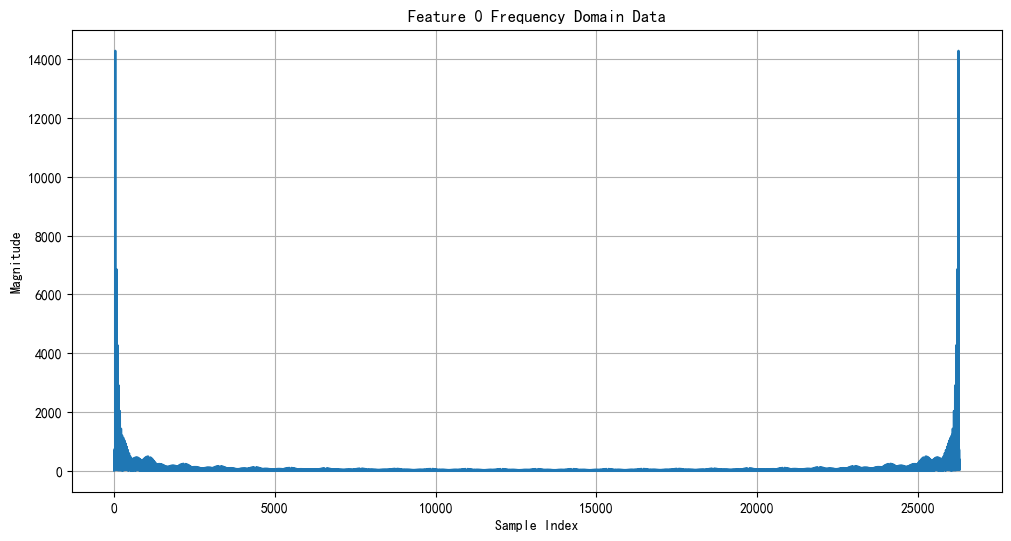

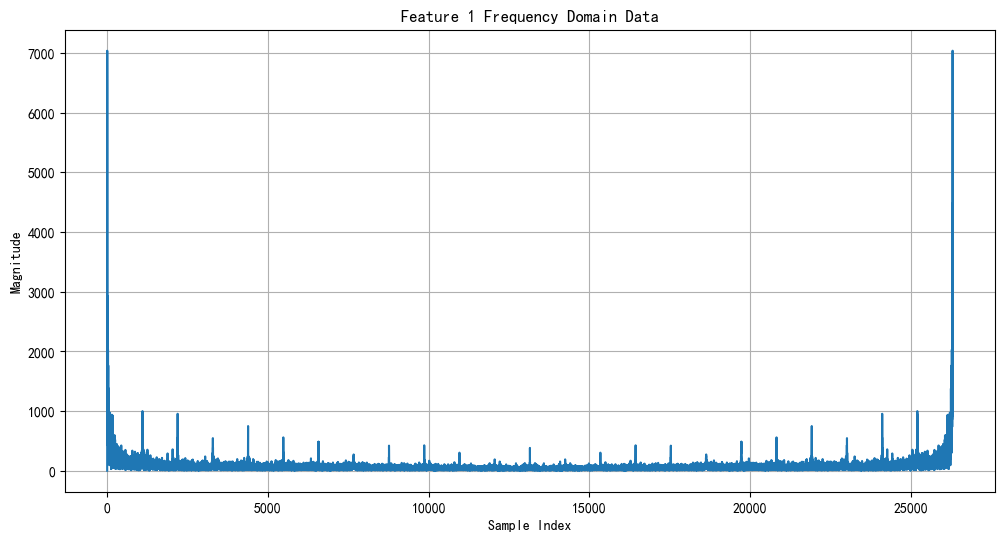

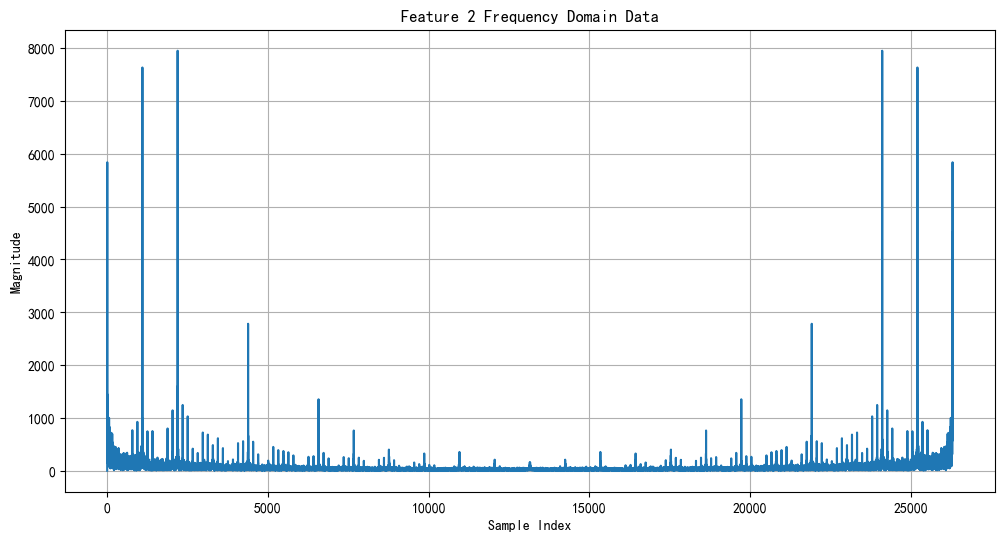

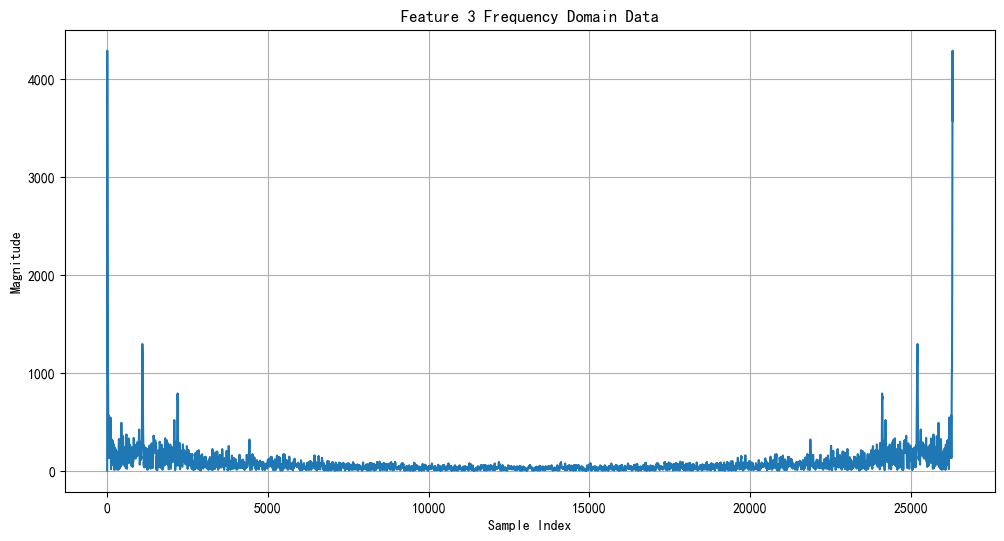

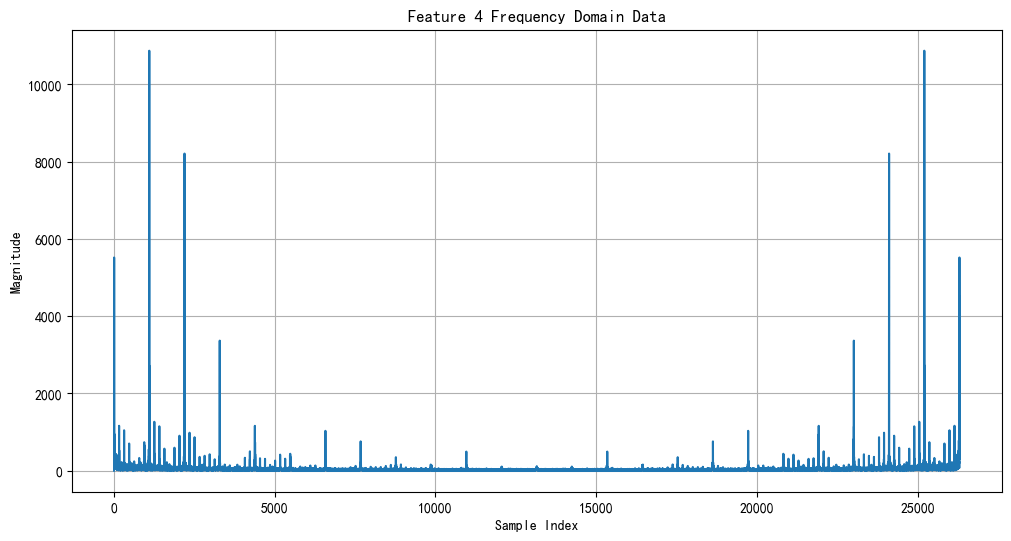

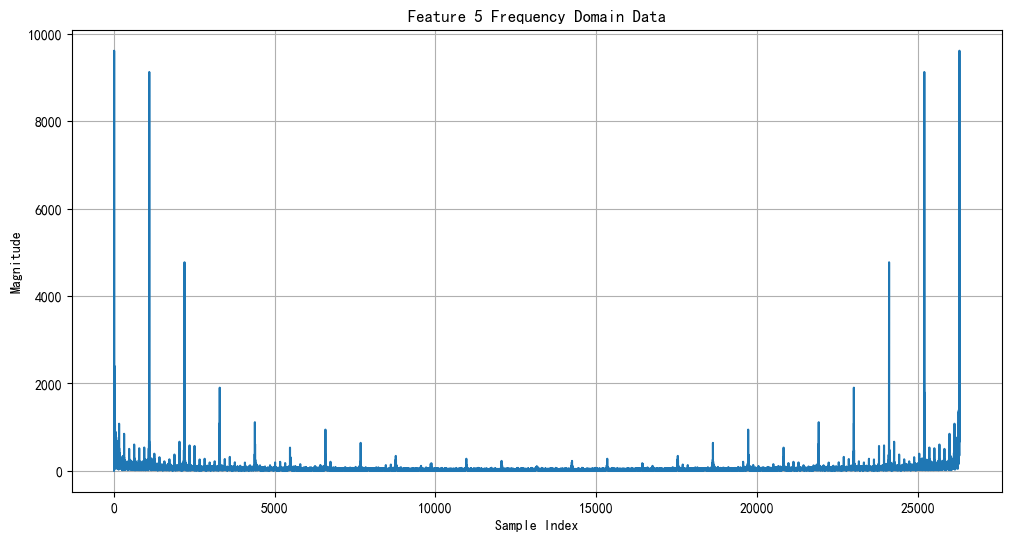

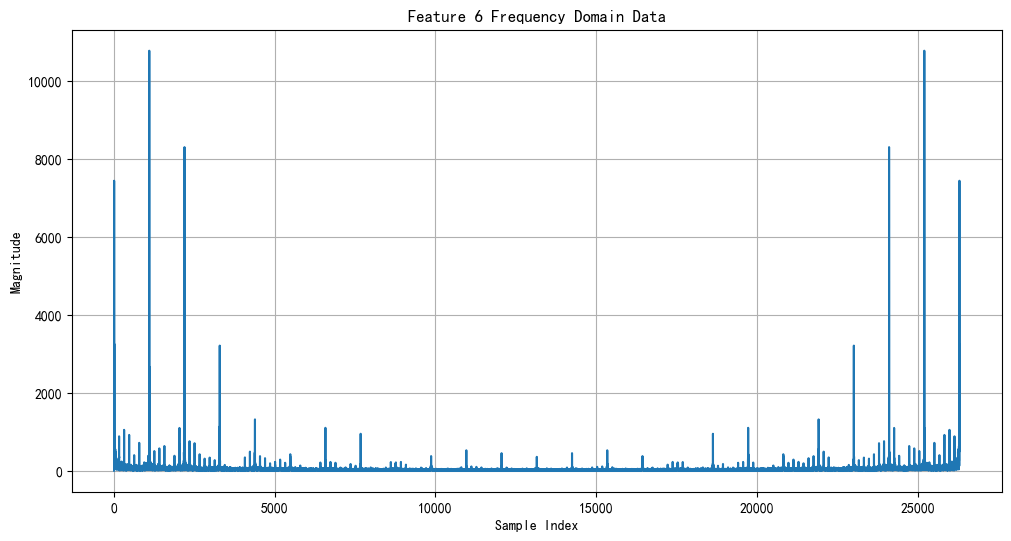

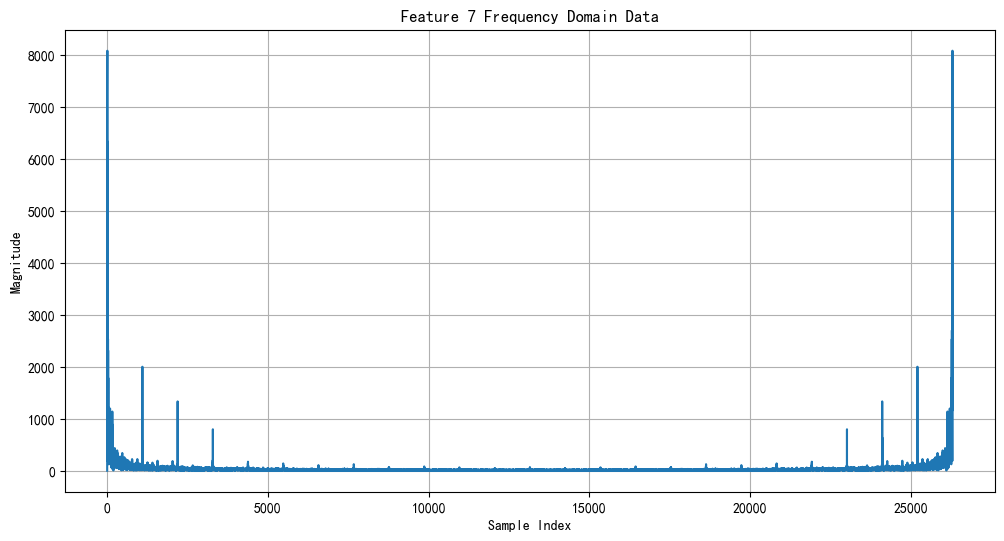

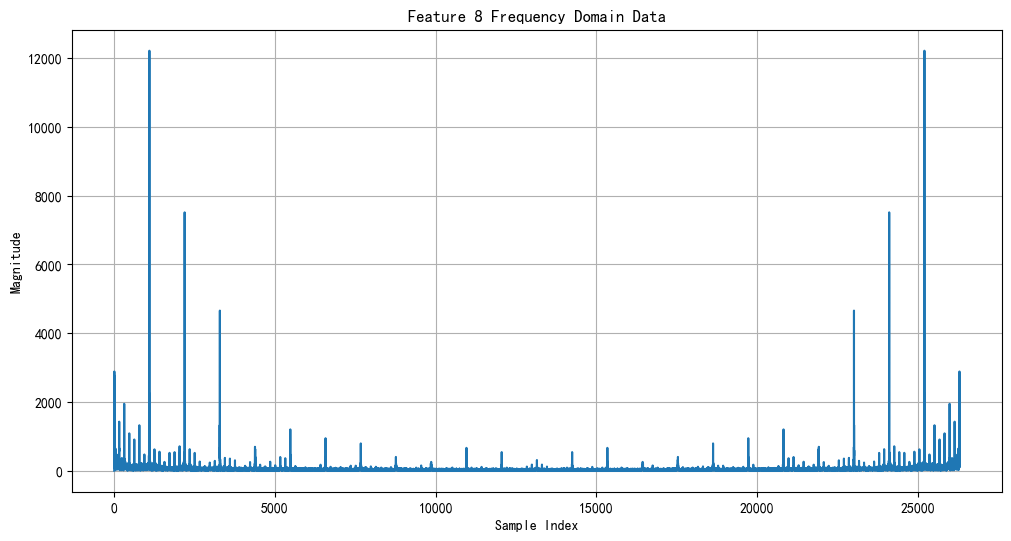

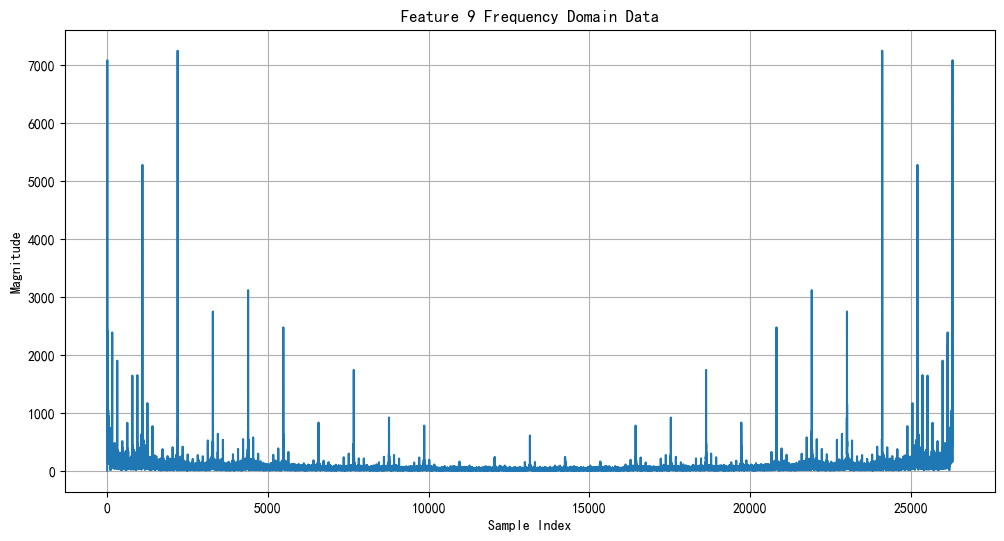

In [10]:
# 选择要绘制的特征
for i in range(10):
    feature_index = i  # 选择第一个特征
    feature_data = freq_domain_features[:, feature_index]
    
    # 绘制频谱图
    plt.figure(figsize=(12, 6))
    plt.plot(feature_data)
    plt.title(f'Feature {feature_index} Frequency Domain Data')
    plt.xlabel('Sample Index')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

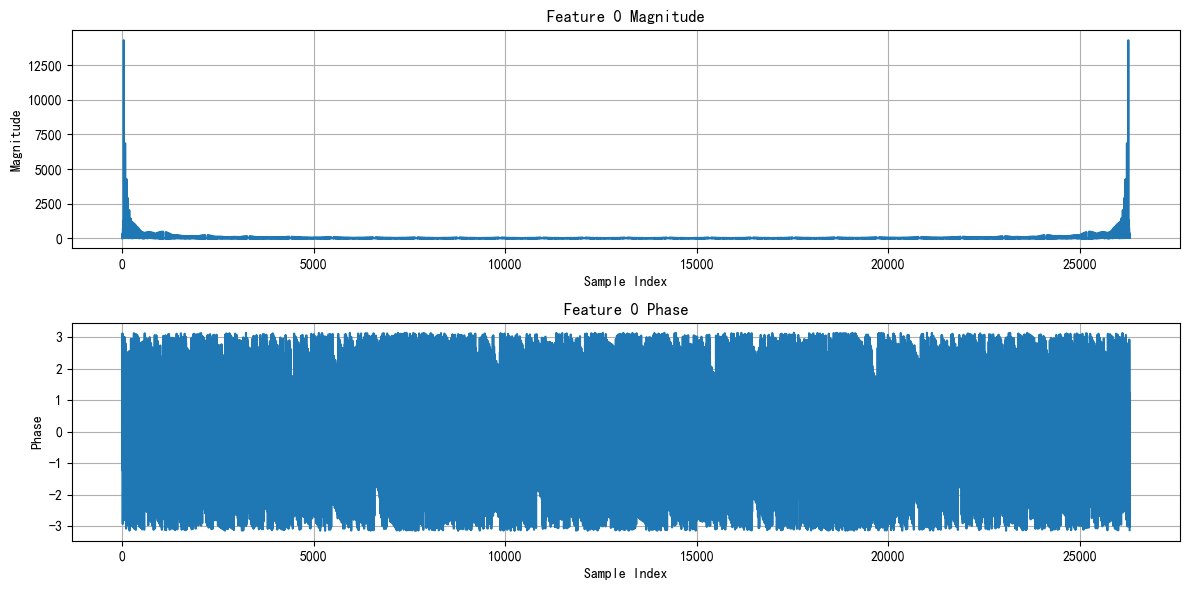

In [11]:
# 分别提取幅度和相位特征
num_samples, num_features = freq_domain_features.shape
num_freq_bins = num_features // 2
magnitude_features = freq_domain_features[:, :num_freq_bins]
phase_features = freq_domain_features[:, num_freq_bins:]

# 选择一个特征进行绘制
feature_index = 0

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(magnitude_features[:, feature_index])
plt.title(f'Feature {feature_index} Magnitude')
plt.xlabel('Sample Index')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(phase_features[:, feature_index])
plt.title(f'Feature {feature_index} Phase')
plt.xlabel('Sample Index')
plt.ylabel('Phase')
plt.grid(True)

plt.tight_layout()
plt.show()